## Telecom Churn: Using Principal Component Analysis (PCA) and Logistic Regression

Main goals of the Case Study is to build ML models :

*   that predict the churn of High-Value Customers
*   to identify important variables that are strong predictors of churn
*   to derive metrics such as Accuracy, Precision and Recall
*   to identify customers who will definitely churn with more accuracy as compared to the ones who'll not churn (False Positive should be less)
*   to recommend strategies to manage customer churn



## Two Models to be built

1.   A model based on PCA to identify the churn
2.   A model based on Logistic Regression to identify the important features for churn



### Import the libraries

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

import warnings
warnings.filterwarnings('ignore')

In [254]:
# Read the dataset

telecom_df = pd.read_csv('/content/sample_data/train.csv')
telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [255]:
telecom_df.shape

(69999, 172)

In [256]:
telecom_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


### Check for Outliers

The describe() function reveals that the columns arpu_6, arpu_7 and arpu_8 seem to have outliers. Check the boxplot for these columns and remove the outliers, if necessary.

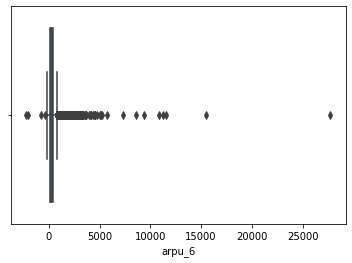

In [257]:
# Check outliers in column arpu_6
sbn.boxplot('arpu_6', data=telecom_df)

In [258]:
# Remove the maximum value since it is a one-off case
print(telecom_df['arpu_6'].max())
telecom_df = telecom_df[~(telecom_df['arpu_6'] > 12500)]
telecom_df['arpu_6'].max()

27731.088


11505.508

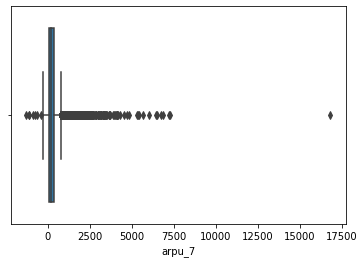

In [259]:
# Check outliers in column arpu_7
sbn.boxplot('arpu_7', data=telecom_df)

In [260]:
# Remove the maximum value since it is a one-off case
print(telecom_df['arpu_7'].max())
telecom_df = telecom_df[~(telecom_df['arpu_7'] > 12500)]
telecom_df['arpu_7'].max()

16820.145


7287.334

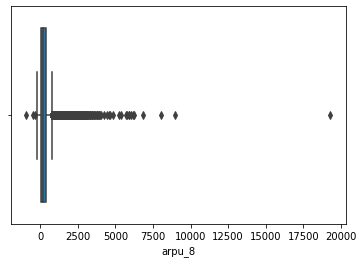

In [261]:
# Check outliers in column arpu_8
sbn.boxplot('arpu_8', data=telecom_df)

In [262]:
# Remove the maximum value since it is a one-off case
print(telecom_df['arpu_8'].max())
telecom_df = telecom_df[~(telecom_df['arpu_8'] > 15000)]
telecom_df['arpu_8'].max()

19295.904


8989.682

In [263]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69995 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 92.4+ MB


In [264]:
# Check how many columns have all null(NA) values
df_numeric = telecom_df.select_dtypes(include='number')
numeric_vars = df_numeric.columns
print(numeric_vars)
df_numeric.shape

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=163)


(69995, 163)

In [265]:
drop_zero_sum_columns = df_numeric.columns[df_numeric.sum(axis=0) == 0]
drop_zero_sum_columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [266]:
telecom_df.drop(drop_zero_sum_columns, axis=1, inplace=True)
telecom_df.shape

(69995, 163)

In [267]:
drop_zero_sum_rows = df_numeric[df_numeric.sum(axis=1) == 0]
drop_zero_sum_rows

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


In [268]:
df_categorical = telecom_df.select_dtypes(include='object')
categorical_vars = df_categorical.columns
print(categorical_vars)
df_categorical.shape

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


(69995, 9)

In [269]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69995 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      69995 non-null  object
 1   last_date_of_month_7      69596 non-null  object
 2   last_date_of_month_8      69262 non-null  object
 3   date_of_last_rech_6       68894 non-null  object
 4   date_of_last_rech_7       68761 non-null  object
 5   date_of_last_rech_8       67534 non-null  object
 6   date_of_last_rech_data_6  17567 non-null  object
 7   date_of_last_rech_data_7  17865 non-null  object
 8   date_of_last_rech_data_8  18416 non-null  object
dtypes: object(9)
memory usage: 5.3+ MB


In [270]:
for col in categorical_vars:
  telecom_df[col] = pd.to_datetime(telecom_df[col])
telecom_df[categorical_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69995 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      69995 non-null  datetime64[ns]
 1   last_date_of_month_7      69596 non-null  datetime64[ns]
 2   last_date_of_month_8      69262 non-null  datetime64[ns]
 3   date_of_last_rech_6       68894 non-null  datetime64[ns]
 4   date_of_last_rech_7       68761 non-null  datetime64[ns]
 5   date_of_last_rech_8       67534 non-null  datetime64[ns]
 6   date_of_last_rech_data_6  17567 non-null  datetime64[ns]
 7   date_of_last_rech_data_7  17865 non-null  datetime64[ns]
 8   date_of_last_rech_data_8  18416 non-null  datetime64[ns]
dtypes: datetime64[ns](9)
memory usage: 5.3 MB


In [271]:
telecom_df.fillna(0)
telecom_df[categorical_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69995 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      69995 non-null  datetime64[ns]
 1   last_date_of_month_7      69596 non-null  datetime64[ns]
 2   last_date_of_month_8      69262 non-null  datetime64[ns]
 3   date_of_last_rech_6       68894 non-null  datetime64[ns]
 4   date_of_last_rech_7       68761 non-null  datetime64[ns]
 5   date_of_last_rech_8       67534 non-null  datetime64[ns]
 6   date_of_last_rech_data_6  17567 non-null  datetime64[ns]
 7   date_of_last_rech_data_7  17865 non-null  datetime64[ns]
 8   date_of_last_rech_data_8  18416 non-null  datetime64[ns]
dtypes: datetime64[ns](9)
memory usage: 5.3 MB


In [272]:
for col in categorical_vars:
  telecom_df[col] = telecom_df[col].dt.strftime('%m/%d/%Y')
telecom_df[categorical_vars]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,06/30/2014,07/31/2014,08/31/2014,06/22/2014,07/10/2014,08/24/2014,NaN,NaN,NaN
1,06/30/2014,07/31/2014,08/31/2014,06/12/2014,07/10/2014,08/26/2014,NaN,07/08/2014,NaN
2,06/30/2014,07/31/2014,08/31/2014,06/11/2014,07/22/2014,08/24/2014,NaN,NaN,NaN
3,06/30/2014,07/31/2014,08/31/2014,06/15/2014,07/21/2014,08/25/2014,NaN,NaN,NaN
4,06/30/2014,07/31/2014,08/31/2014,06/25/2014,07/26/2014,08/30/2014,06/25/2014,07/23/2014,08/20/2014
...,...,...,...,...,...,...,...,...,...
69994,06/30/2014,07/31/2014,08/31/2014,06/18/2014,07/31/2014,08/31/2014,NaN,07/31/2014,08/21/2014
69995,06/30/2014,07/31/2014,08/31/2014,06/28/2014,07/31/2014,08/27/2014,NaN,NaN,NaN
69996,06/30/2014,07/31/2014,08/31/2014,06/25/2014,07/30/2014,08/29/2014,NaN,NaN,NaN
69997,06/30/2014,07/31/2014,08/31/2014,06/29/2014,07/19/2014,08/26/2014,06/17/2014,07/13/2014,08/14/2014


In [273]:
telecom_df.drop(categorical_vars, axis=1, inplace=True)

In [274]:
telecom_df.drop('circle_id', axis=1, inplace=True)

In [275]:
# for col in categorical_vars:
#   telecom_df[col] = telecom_df[col].dt.day
#telecom_df[categorical_vars].max()

In [276]:
# print(telecom_df['last_date_of_month_7'].isna().any())
# telecom_df['last_date_of_month_7'] = telecom_df['last_date_of_month_7'].fillna(telecom_df['last_date_of_month_7'].max())
# telecom_df['last_date_of_month_7'].isna().any()

In [277]:
# print(telecom_df['last_date_of_month_8'].isna().any())
# telecom_df['last_date_of_month_8'] = telecom_df['last_date_of_month_8'].fillna(telecom_df['last_date_of_month_8'].max())
# telecom_df['last_date_of_month_8'].isna().any()

In [278]:
telecom_df = telecom_df.fillna(0)

In [279]:
# Remove all the columns where the data in all the rows is same
# def columns_with_same_data(df):
#     a = telecom_df.to_numpy() # df.values (pandas<0.24)
#     return (a[0] == a).all(0)

# one_value_columns = np.array(telecom_df.columns[columns_with_same_data(telecom_df)])
# # 'circle_id' 'last_date_of_month_6'

# # In addtion to last_date_of_month_6, last_date_of_month_7 and last_date_of_month_8 also have the same value
# # in all the rows. Hence remove those columns too.
# print(one_value_columns)
# one_value_columns = np.append(one_value_columns, 'last_date_of_month_7')
# one_value_columns = np.append(one_value_columns, 'last_date_of_month_8')
# print(one_value_columns)
# #telecom_df.drop(one_value_columns, axis=1, inplace=True)



In [280]:
y = telecom_df.pop('churn_probability')

# Principal Component Analysis

In [281]:
from sklearn.preprocessing import StandardScaler

In [282]:
scaler = StandardScaler()

X = telecom_df.copy()


In [283]:
x = scaler.fit_transform(X)



In [284]:
x[:100,:100]

array([[-1.73203128, -0.81227202, -0.62124475, ..., -0.32700548,
        -0.32624951, -0.79078828],
       [-1.73198179, -0.91348325, -0.50434559, ..., -0.86513376,
         0.34253388, -0.46609943],
       [-1.7319323 , -0.71671725, -0.56842154, ..., -0.28561099,
        -0.28445055, -0.8719605 ],
       ...,
       [-1.72723103,  0.26684743, -0.00900266, ...,  0.12833384,
         0.04994115, -0.46609943],
       [-1.72718154,  2.32479411, -0.24766605, ...,  0.19456501,
         0.20041741,  0.18327826],
       [-1.72713205, -0.24503671, -0.65963934, ...,  0.19456501,
        -0.03365678, -0.46609943]])

### Apply PCA

In [285]:
from sklearn.decomposition import PCA

In [286]:
pca = PCA(random_state=42)


In [287]:
pca.fit(x)

PCA(random_state=42)

In [288]:
pca.components_

array([[ 1.54774914e-03,  1.51877349e-01,  1.66654742e-01, ...,
         1.10389639e-01,  1.13320113e-01,  1.07793765e-01],
       [ 4.38549853e-04, -9.23864212e-02, -1.01853115e-01, ...,
         8.95415643e-02,  9.36329921e-02,  9.02830147e-02],
       [ 2.22984849e-03, -4.43883105e-02, -6.39267586e-02, ...,
         8.51796365e-03,  8.16575536e-03,  9.11541324e-03],
       ...,
       [ 0.00000000e+00, -2.95458074e-16,  1.83997284e-16, ...,
         4.70534319e-17,  1.91700586e-17, -2.81433279e-17],
       [-0.00000000e+00, -3.28255972e-16,  2.06742632e-16, ...,
        -2.60261616e-17,  5.39774457e-17,  4.43550105e-17],
       [ 0.00000000e+00,  5.14764181e-16, -2.26436033e-16, ...,
        -1.03018027e-17, -8.08846022e-17,  6.19688103e-17]])

In [289]:
pca.explained_variance_ratio_

array([1.27935089e-01, 9.33367601e-02, 6.18012304e-02, 4.97842704e-02,
       3.72669426e-02, 2.89592035e-02, 2.64130883e-02, 2.42255090e-02,
       2.16761925e-02, 2.11274706e-02, 2.02270636e-02, 1.98167775e-02,
       1.85744159e-02, 1.68590693e-02, 1.65796898e-02, 1.56693941e-02,
       1.47828936e-02, 1.43023272e-02, 1.37360018e-02, 1.32098951e-02,
       1.17475104e-02, 1.14101913e-02, 1.10534498e-02, 1.06115722e-02,
       1.03410835e-02, 1.00069289e-02, 9.97473890e-03, 9.47342515e-03,
       8.39094732e-03, 8.15955918e-03, 7.82159352e-03, 7.58422884e-03,
       6.92361764e-03, 6.79726144e-03, 6.71447242e-03, 6.56405569e-03,
       6.50261408e-03, 6.29957793e-03, 6.22124855e-03, 6.05149070e-03,
       5.97883825e-03, 5.69089404e-03, 5.52962292e-03, 5.45535405e-03,
       5.39300083e-03, 5.30888281e-03, 4.81421527e-03, 4.73387050e-03,
       4.69525660e-03, 4.47511651e-03, 4.29020563e-03, 4.12278683e-03,
       3.80403829e-03, 3.79230001e-03, 3.62868696e-03, 3.38765935e-03,
      

In [290]:
import matplotlib.pyplot as plt

<Figure size 1080x720 with 0 Axes>

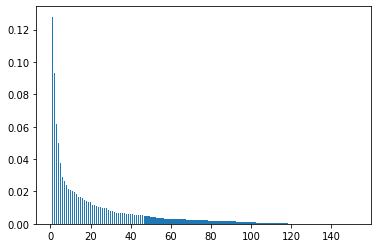

<Figure size 1080x720 with 0 Axes>

In [291]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.figure(figsize=(15,10))

In [292]:
var_cumulative = np.cumsum(pca.explained_variance_ratio_)

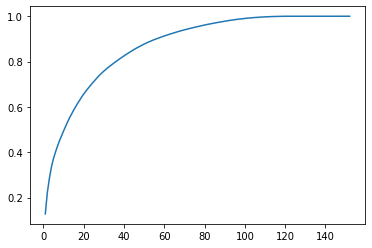

In [293]:
plt.plot(range(1, len(var_cumulative)+1), var_cumulative)
# 60 components explain around 90% variance.

### PCA with 60 components

In [294]:
pca60 = PCA(n_components=60, random_state=42)

In [295]:
newdata = pca60.fit_transform(x)

In [296]:
newdata.shape

(69995, 60)

In [297]:
pca_df = pd.DataFrame(newdata)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-3.817312,0.942961,-0.514182,0.986054,0.130065,0.409700,-0.016430,0.183064,-0.037343,-0.301286,...,0.095394,0.036521,-0.064541,-0.021094,0.028583,0.089694,-0.011156,0.029318,0.106858,0.072360
1,-2.228688,2.725973,-0.768443,0.787169,-0.086375,0.782553,0.087666,-0.696460,1.064063,-0.766647,...,-0.501500,0.557321,-0.047718,-0.045171,0.136751,0.042995,-0.133394,-0.151582,-0.112688,0.149434
2,-3.743626,1.095724,-0.002497,0.854774,0.032349,0.370468,-0.171653,0.104096,-0.420532,-0.266265,...,0.101121,-0.063323,-0.102555,0.093679,-0.072671,0.053064,0.208867,0.041878,0.117811,0.112969
3,-2.965022,0.639187,0.115832,0.929594,-0.340381,0.138545,-0.350880,0.057753,0.048704,-0.045207,...,-0.092737,-0.448577,0.026700,0.134006,0.001730,0.007167,0.151817,0.022760,0.136710,0.248233
4,0.901594,5.699137,-3.135159,-8.918165,-0.701775,-2.025436,-0.142564,1.359477,-0.942180,0.604473,...,0.635794,0.324386,0.142122,-0.183136,0.103570,-0.146640,-0.010595,-0.136978,0.403684,-0.325271


In [298]:
pca_final_df = pd.concat([pca_df, y], axis=1)

In [299]:
pca_final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,churn_probability
0,-3.817312,0.942961,-0.514182,0.986054,0.130065,0.409700,-0.016430,0.183064,-0.037343,-0.301286,...,0.036521,-0.064541,-0.021094,0.028583,0.089694,-0.011156,0.029318,0.106858,0.072360,0.0
1,-2.228688,2.725973,-0.768443,0.787169,-0.086375,0.782553,0.087666,-0.696460,1.064063,-0.766647,...,0.557321,-0.047718,-0.045171,0.136751,0.042995,-0.133394,-0.151582,-0.112688,0.149434,0.0
2,-3.743626,1.095724,-0.002497,0.854774,0.032349,0.370468,-0.171653,0.104096,-0.420532,-0.266265,...,-0.063323,-0.102555,0.093679,-0.072671,0.053064,0.208867,0.041878,0.117811,0.112969,0.0
3,-2.965022,0.639187,0.115832,0.929594,-0.340381,0.138545,-0.350880,0.057753,0.048704,-0.045207,...,-0.448577,0.026700,0.134006,0.001730,0.007167,0.151817,0.022760,0.136710,0.248233,0.0
4,0.901594,5.699137,-3.135159,-8.918165,-0.701775,-2.025436,-0.142564,1.359477,-0.942180,0.604473,...,0.324386,0.142122,-0.183136,0.103570,-0.146640,-0.010595,-0.136978,0.403684,-0.325271,0.0


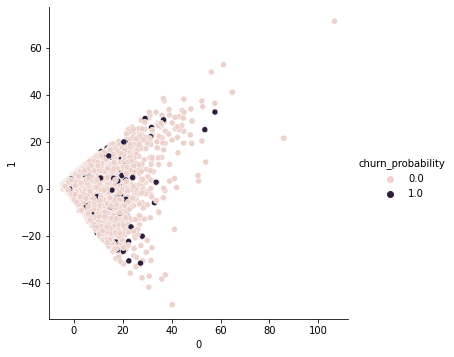

In [300]:
sbn.pairplot(data=pca_final_df, x_vars=[0], y_vars=[1], hue='churn_probability', size=5)

### Incremental PCA

In [301]:
from sklearn.decomposition import IncrementalPCA

In [302]:
incpca60 = IncrementalPCA(n_components=60)

In [303]:
train_pca = incpca60.fit_transform(telecom_df)

In [304]:
corr_matrix = np.corrcoef(train_pca.transpose())

In [305]:
corr_matrix.shape

(60, 60)

### Plot the heat map

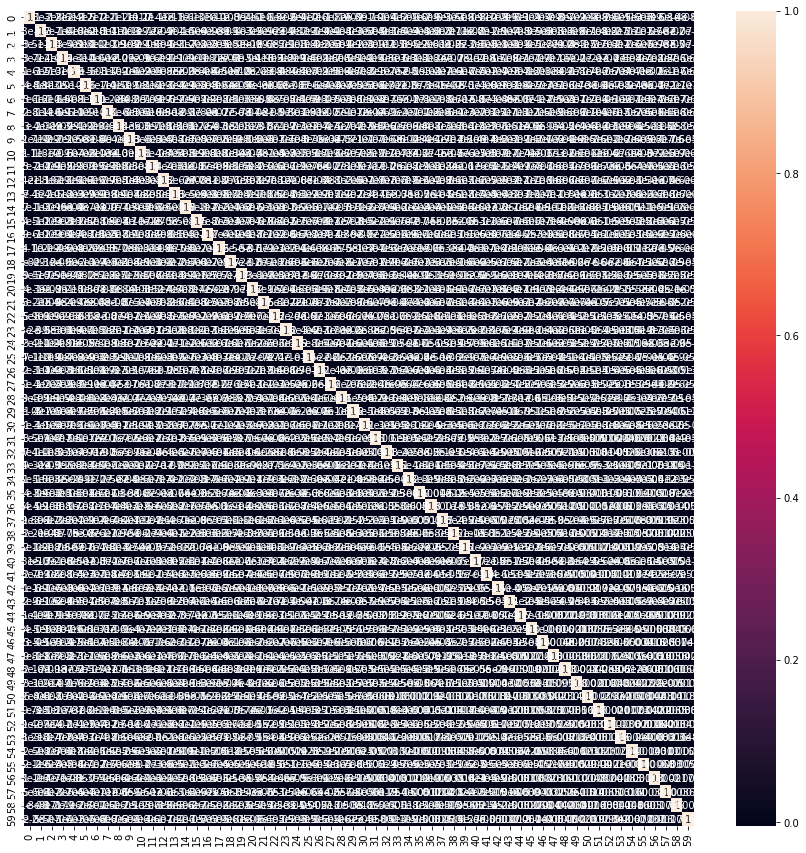

In [306]:
plt.figure(figsize=[15,15])
sbn.heatmap(corr_matrix, annot=True)

### The above heatmap shows that there is absolutely no correlation among the components, which is what is desired.

## Prepare the test data similar to the training data before the transformation

In [307]:
# Read the dataset

test_df = pd.read_csv('/content/sample_data/test.csv')
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [308]:
# Check how many columns have all null(NA) values
df_numeric_test = telecom_df.select_dtypes(include='number')
numeric_vars_test = df_numeric_test.columns
print(numeric_vars_test)
df_numeric_test.shape

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object', length=152)


(69995, 152)

In [309]:
drop_zero_sum_columns_test = df_numeric_test.columns[df_numeric_test.sum(axis=0) == 0]
drop_zero_sum_columns_test

Index([], dtype='object')

In [310]:
test_df.drop(drop_zero_sum_columns, axis=1, inplace=True)
test_df.shape

(30000, 162)

In [314]:
df_categorical_test = test_df.select_dtypes(include='object')
categorical_vars_test = df_categorical_test.columns
print(categorical_vars_test)
df_categorical_test.shape

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


(30000, 9)

In [315]:
df_categorical_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      30000 non-null  object
 1   last_date_of_month_7      29798 non-null  object
 2   last_date_of_month_8      29633 non-null  object
 3   date_of_last_rech_6       29494 non-null  object
 4   date_of_last_rech_7       29467 non-null  object
 5   date_of_last_rech_8       28839 non-null  object
 6   date_of_last_rech_data_6  7585 non-null   object
 7   date_of_last_rech_data_7  7706 non-null   object
 8   date_of_last_rech_data_8  7922 non-null   object
dtypes: object(9)
memory usage: 2.1+ MB


In [316]:
for col in categorical_vars_test:
  test_df[col] = pd.to_datetime(test_df[col])
test_df[categorical_vars_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      30000 non-null  datetime64[ns]
 1   last_date_of_month_7      29798 non-null  datetime64[ns]
 2   last_date_of_month_8      29633 non-null  datetime64[ns]
 3   date_of_last_rech_6       29494 non-null  datetime64[ns]
 4   date_of_last_rech_7       29467 non-null  datetime64[ns]
 5   date_of_last_rech_8       28839 non-null  datetime64[ns]
 6   date_of_last_rech_data_6  7585 non-null   datetime64[ns]
 7   date_of_last_rech_data_7  7706 non-null   datetime64[ns]
 8   date_of_last_rech_data_8  7922 non-null   datetime64[ns]
dtypes: datetime64[ns](9)
memory usage: 2.1 MB


In [317]:
test_df.fillna(0)
test_df[categorical_vars_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      30000 non-null  datetime64[ns]
 1   last_date_of_month_7      29798 non-null  datetime64[ns]
 2   last_date_of_month_8      29633 non-null  datetime64[ns]
 3   date_of_last_rech_6       29494 non-null  datetime64[ns]
 4   date_of_last_rech_7       29467 non-null  datetime64[ns]
 5   date_of_last_rech_8       28839 non-null  datetime64[ns]
 6   date_of_last_rech_data_6  7585 non-null   datetime64[ns]
 7   date_of_last_rech_data_7  7706 non-null   datetime64[ns]
 8   date_of_last_rech_data_8  7922 non-null   datetime64[ns]
dtypes: datetime64[ns](9)
memory usage: 2.1 MB


In [318]:
for col in categorical_vars_test:
  test_df[col] = test_df[col].dt.strftime('%m/%d/%Y')
test_df[categorical_vars_test]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,06/30/2014,07/31/2014,08/31/2014,06/21/2014,07/26/2014,08/24/2014,NaN,NaN,NaN
1,06/30/2014,07/31/2014,08/31/2014,06/19/2014,07/16/2014,08/24/2014,NaN,NaN,NaN
2,06/30/2014,07/31/2014,08/31/2014,06/29/2014,07/27/2014,08/28/2014,NaN,NaN,NaN
3,06/30/2014,07/31/2014,08/31/2014,06/25/2014,07/30/2014,08/24/2014,NaN,NaN,NaN
4,06/30/2014,07/31/2014,08/31/2014,06/29/2014,07/29/2014,08/30/2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
29995,06/30/2014,07/31/2014,08/31/2014,06/27/2014,07/27/2014,08/29/2014,06/19/2014,NaN,NaN
29996,06/30/2014,07/31/2014,08/31/2014,06/18/2014,07/24/2014,08/29/2014,NaN,07/10/2014,NaN
29997,06/30/2014,07/31/2014,08/31/2014,06/22/2014,07/10/2014,08/30/2014,NaN,NaN,NaN
29998,06/30/2014,07/31/2014,08/31/2014,06/30/2014,07/18/2014,08/31/2014,NaN,NaN,NaN


In [319]:
test_df.drop(categorical_vars_test, axis=1, inplace=True)

In [320]:
test_df.drop('circle_id', axis=1, inplace=True)

In [321]:
test_df = test_df.fillna(0)

In [323]:
scaler_test = StandardScaler()

X_test = test_df.copy()

In [324]:
x_test = scaler_test.fit_transform(X_test)

## Apply the transformation on the test data

In [325]:
test_pca = incpca60.transform(x_test)

In [326]:
test_pca.shape

(30000, 60)

### Apply Logistic Regression on the PCA test data

In [327]:
from sklearn.linear_model import LogisticRegression

In [328]:
pca_learn_log = LogisticRegression()

In [330]:
model_pca_log = pca_learn_log.fit(train_pca, y)

In [331]:
pred_prob = model_pca_log.predict_proba(test_pca)

In [332]:
pred_prob

array([[0.40319206, 0.59680794],
       [0.40312083, 0.59687917],
       [0.40310798, 0.59689202],
       ...,
       [0.40320232, 0.59679768],
       [0.40239712, 0.59760288],
       [0.40198641, 0.59801359]])

In [335]:
y_pred_df = pd.DataFrame(pred_prob)
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.head()

,1
0,0.596808
1,0.596879
2,0.596892
3,0.596526
4,0.596429


In [358]:
data = {'id'}
y_test_df = pd.DataFrame(data)
y_test_df['id'] = y_test_df.index

In [363]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [364]:
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [365]:
y_pred_final.drop(0, axis=1, inplace=True)
y_pred_final

,id,1
0,0.0,0.596808
1,NaN,0.596879
2,NaN,0.596892
3,NaN,0.596526
4,NaN,0.596429
...,...,...
29995,NaN,0.596502
29996,NaN,0.596799
29997,NaN,0.596798
29998,NaN,0.597603


In [367]:
y_pred_final.drop('id', axis=1, inplace=True)
y_pred_final

,1
0,0.596808
1,0.596879
2,0.596892
3,0.596526
4,0.596429
...,...
29995,0.596502
29996,0.596799
29997,0.596798
29998,0.597603


In [370]:
y_pred_final.index.names = ['id']

In [377]:
y_pred_final = y_pred_final.rename(columns={'churn_probability':'churn'})

In [379]:
y_pred_final['churn_probability'] = y_pred_final.churn.map(lambda x:1 if x > 0.5 else 0)

In [381]:
y_pred_final.drop('churn', axis=1, inplace=True)

In [384]:
y_pred_final = y_pred_final.rename(columns={'id':'index'})

In [387]:
y_pred_final['id'] = test_df['id']

In [388]:
y_pred_final.head()

,churn_probability,id
id,,
0,1,69999
1,1,70000
2,1,70001
3,1,70002
4,1,70003


In [389]:
y_pred_final.to_csv('submission.csv', sep='\t')

# Hiding for now

In [43]:
# Considering that the users having the arpu more than the average 
# for that month as high-value customers.

no_churn_df = telecom_df[(telecom_df['arpu_6'] > telecom_df['arpu_6'].mean()) 
& (telecom_df['arpu_7'] > telecom_df['arpu_7'].mean()) 
& (telecom_df['arpu_8'] > telecom_df['arpu_8'].mean())]
no_churn_df

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,...,0,0,NaN,NaN,NaN,322,0.00,0.00,0.00,0
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,0,0,1.0,NaN,1.0,602,0.00,0.00,0.00,0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,...,0,0,NaN,NaN,NaN,455,0.00,0.00,0.00,0
25,25,362.951,321.763,689.603,193.71,124.53,197.54,423.21,184.88,556.61,...,0,0,NaN,NaN,NaN,2831,0.00,0.00,0.00,0
27,27,390.489,350.985,421.300,8.58,11.48,12.68,133.16,158.73,182.83,...,1,1,1.0,1.0,1.0,573,700.40,185.71,173.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69970,69970,447.510,317.625,1058.921,935.31,583.61,2485.21,134.36,99.66,128.19,...,0,0,NaN,NaN,NaN,482,0.00,0.00,0.00,0
69971,69971,349.877,435.678,751.630,362.96,469.31,1772.01,429.26,649.53,216.36,...,0,0,NaN,NaN,NaN,605,0.00,0.00,0.00,0
69972,69972,454.012,346.047,610.083,303.29,193.31,532.93,221.99,139.09,319.46,...,0,0,NaN,NaN,0.0,184,0.00,0.00,0.00,0
69973,69973,421.470,607.540,767.800,93.43,275.28,456.46,471.29,1050.34,1191.86,...,1,2,1.0,1.0,1.0,825,74.58,81.39,277.48,0


In [45]:
#high_value_df.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,14297.000000,14297.000000,14297.000000,14297.000000,14257.000000,14259.000000,14261.000000,14257.000000,14259.000000,14261.000000,...,14297.000000,14297.000000,5784.000000,5981.000000,6495.000000,14297.000000,14297.000000,14297.000000,14297.000000,14297.000000
mean,35152.110862,640.734336,652.919203,650.382861,321.414356,337.591726,328.659600,460.289141,472.915318,458.903796,...,0.177800,0.175631,0.899896,0.893663,0.839415,1351.497237,154.980499,153.259608,138.588465,0.030706
std,20219.601496,392.873725,402.504566,404.404599,477.676376,522.742600,516.334653,471.928720,493.750087,473.543496,...,1.097768,1.173945,0.300164,0.308294,0.367176,996.568812,431.316524,441.106944,428.110464,0.172525
min,12.000000,282.298000,277.196000,277.765000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,17679.000000,399.446000,404.540000,404.306000,54.530000,54.485000,52.260000,172.780000,172.030000,168.460000,...,0.000000,0.000000,1.000000,1.000000,1.000000,495.000000,0.000000,0.000000,0.000000,0.000000
50%,35452.000000,531.466000,544.440000,541.720000,147.360000,148.630000,144.260000,323.710000,330.830000,325.210000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1024.000000,0.000000,0.000000,0.000000,0.000000
75%,52797.000000,752.408000,768.601000,757.430000,393.390000,401.445000,392.910000,577.840000,599.710000,583.010000,...,0.000000,0.000000,1.000000,1.000000,1.000000,2158.000000,50.130000,29.520000,10.540000,0.000000
max,69984.000000,10877.945000,7199.400000,8989.682000,7376.710000,8157.780000,10752.560000,6712.810000,7043.980000,7857.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,1.000000


In [46]:
# telecom_df[(telecom_df['arpu_6'] + telecom_df['arpu_7'] + telecom_df['arpu_8']) < 0]
# Find all the users for whom the arpu has dropped drastically in the months of 7 and 8
# These are users that have definitely churned or on their way out
#high_value_df[(high_value_df['arpu_8'] + high_value_df['arpu_7']) <= 0]

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
